# 🏀VBO PLAYERS ANALYSIS 🏀

#### Import Nessesary Libaries 

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Task 1: Merge all data from different days into a single CSV file

In [85]:
all_concat_data = pd.DataFrame()

df =pd.ExcelFile("./data/1 Games Player Stats.xlsx")
excl_list = []

for sheet_name in df.sheet_names:
    df_iter= pd.read_excel("./data/1 Games Player Stats.xlsx", sheet_name=sheet_name)
    excl_list.append(df_iter)

for excl_file in excl_list:

    all_concat_data = pd.concat([excl_file,all_concat_data], ignore_index=True)
    
all_concat_data.to_csv("./data/all_players_data.csv", index=False)    


#### Read in updated dataframe

In [86]:
player_df = pd.read_csv("./data/all_players_data.csv")
#player_df.head()

<font color='Blue' size='5'>Metric 1: Top 5 players with highest FG% (All Goals for the Season)</font>

#### Step 1: Sum all players Field Goals attempt

In [87]:
field_goal_attempt_col=['3_FGA','2_FGA','1_FTA']
season_goal_attempt = player_df.groupby("Full Name")[field_goal_attempt_col].sum().reset_index()
all_goal_attempt_df = pd.DataFrame(season_goal_attempt)
all_goal_attempt_df["Goal_attempt_total"] = all_goal_attempt_df[field_goal_attempt_col].sum(axis=1)

#### Step 2: Sum all players Field Goals made and merge with the dataframe groupby goal_attempt_total

In [88]:
field_goal_made_col= ['3_FGM','2_FGM','1_FTM']
season_goal_made = player_df.groupby("Full Name")[field_goal_made_col].sum()
all_goal_made_df = pd.DataFrame(season_goal_made)
merged_ga_gm_df = pd.merge(all_goal_attempt_df, all_goal_made_df, on='Full Name', how='outer')

merged_ga_gm_df["Goal_made_total"]=merged_ga_gm_df[field_goal_made_col].sum(axis=1)

#### Step3: Calculate Goal Percentage and get top 5

In [89]:
merged_ga_gm_df['Goal%']= round((merged_ga_gm_df['Goal_made_total'] / merged_ga_gm_df['Goal_attempt_total'])*100,2)
# enable the line below if client require goal attempt filter more than X amount
merged_ga_gm_df=merged_ga_gm_df[merged_ga_gm_df["Goal_attempt_total"]>10]

In [90]:
merged_ga_gm_df_graph=merged_ga_gm_df.groupby(['Full Name'])['Goal%'].sum().sort_values(ascending=False).head(10)

#### Step4: plot the graph

Full Name
Thoai       50.00
Quan Mai    44.44
Jackie      42.86
An nho      41.67
Thien       24.14
Duc Le      23.08
Name: Goal%, dtype: float64


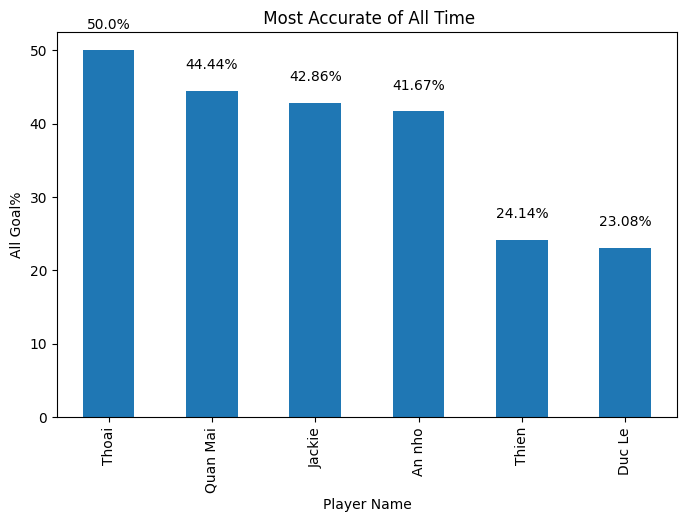

In [91]:
print(merged_ga_gm_df_graph)
number_on_chart = merged_ga_gm_df_graph.plot(kind='bar',x='Full Name',y='Goal%', title=' Most Accurate of All Time', ylabel='All Goal%',
         xlabel='Player Name', figsize=(8, 5))

for p in number_on_chart.patches:
    number_on_chart.text(p.get_x() + p.get_width()/2, p.get_height() + 3, str(p.get_height())+"%", ha='center') 

<font color='Blue' size='5'> Metric 2: Top3 Most Improved overall Players (Used EFF overtime)</font>

In [92]:
player_eff_df = player_df.groupby(['DATE', 'Full Name'])['EFF(efficiency point)'].sum().sort_values(ascending=True).reset_index()
print(player_eff_df)

          DATE      Full Name  EFF(efficiency point)
0   2023-02-19          Thien                    -11
1   2023-02-19            Dat                     -3
2   2023-02-19       Duy Minh                     -1
3   2023-02-19            Lap                      0
4   2023-02-19           Khai                      2
5   2023-02-19  Minh Chu Tich                      2
6   2023-02-19         An nho                      7
7   2023-02-19          Thoai                      9
8   2023-02-19         Duc Le                     10
9   2023-02-19        Quan To                     11
10  2023-02-19          An To                     12
11  2023-02-19       Quan Mai                     14
12  2023-02-19         Jackie                     21


<font color='Red' size='5'> In progress </font>

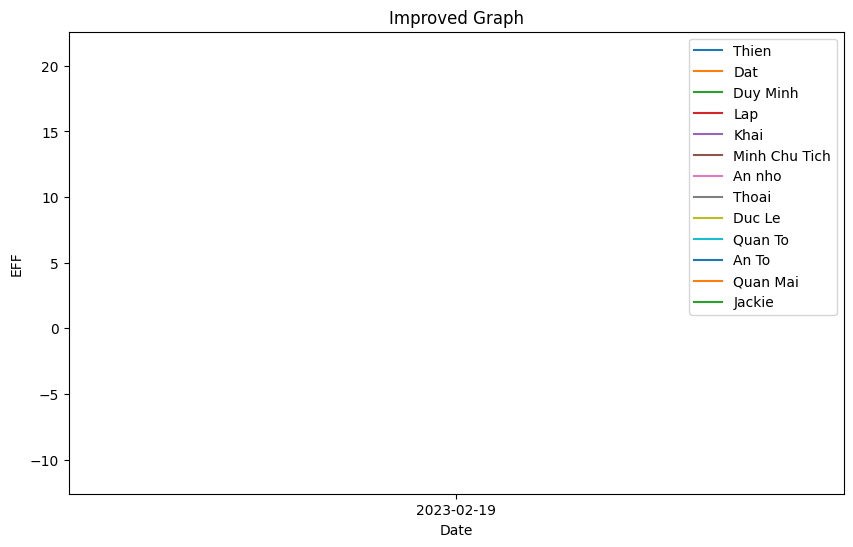

In [93]:
fig, ax = plt.subplots(figsize=(10, 6))
for player in player_eff_df['Full Name'].unique():
    player_data = player_eff_df[player_eff_df['Full Name'] == player]
    ax.plot(player_data['DATE'], player_data['EFF(efficiency point)'], label=player)
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('EFF')
ax.set_title('Improved Graph')
plt.show()

<font color='Blue' size='5'> Metric 3: Point Distribution for teams on a specific date  </font>

#### Step1: Group Date of play, player name and score 

In [94]:
day_basket_made = player_df.groupby(['DATE','Full Name','Team']).agg({'PTS': ['max']})
day_basket_made.columns = ["PTS"]
day_basket_made = day_basket_made.reset_index().sort_values(by="PTS",ascending=False).reset_index(drop=True)
day_basket_made=day_basket_made[day_basket_made["PTS"]>0]

#### Step2: request a date of play

In [95]:
date_to_plot = '2023-02-19'
day_basket_made_filtered = day_basket_made[day_basket_made['DATE'] == date_to_plot]
print(day_basket_made_filtered)

         DATE Full Name   Team  PTS
0  2023-02-19    Jackie  green   17
1  2023-02-19     Thien    red   12
2  2023-02-19  Quan Mai  green   11
3  2023-02-19     Thoai  green   10
4  2023-02-19    An nho    red    8
5  2023-02-19    Duc Le  green    6
6  2023-02-19      Khai    red    1
7  2023-02-19   Quan To  green    1


#### Step3: seperate teams and plot differents charts for each team

<font color='Red' size='5'> In progress (manual way for now) </font>

In [96]:
blue_team = day_basket_made_filtered[day_basket_made_filtered['Team'] == 'green']
red_team = day_basket_made_filtered[day_basket_made_filtered['Team'] == 'red']

Blue team score: 45
Red team score: 21


<Axes: >

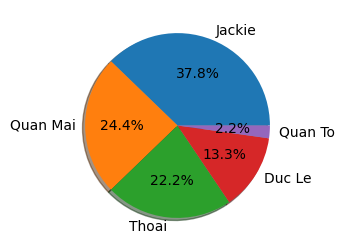

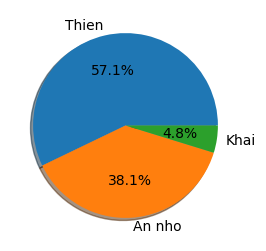

In [97]:
print("Blue team score: "+str(blue_team['PTS'].sum()))
print("Red team score: "+str(red_team['PTS'].sum()))
blue_team.plot(kind='pie', y='PTS',ylabel="", labels=blue_team['Full Name'],autopct='%1.1f%%',figsize=(5, 3), legend=False,shadow=True)
red_team.plot(kind='pie', y='PTS',ylabel="", labels=red_team['Full Name'],autopct='%1.1f%%',figsize=(5, 3), legend=False,shadow=True)

<font color='Blue' size='5'> Metric 4: Rebounds Distribution for teams on a specific date</font>

In [98]:
reb_col=["REB","OREB","DREB"]
reb_df = player_df.groupby(['DATE','Full Name','Team'])[reb_col].sum()
reb_df.columns = ["REB","OREB","DREB"]
reb_df = reb_df.reset_index().sort_values(by="REB",ascending=False).reset_index(drop=True)
reb_df=reb_df[reb_df["REB"]>0]

In [41]:
date_to_plot = '2023-02-19'
reb_date_df = reb_df[reb_df['DATE'] == date_to_plot]
print(reb_date_df)

          DATE      Full Name   Team  REB  OREB  DREB
0   2023-02-19          An To  green   17   1.0  16.0
1   2023-02-19       Quan Mai  green   13   5.0   8.0
2   2023-02-19        Quan To  green   10   2.0   8.0
3   2023-02-19         Duc Le  green    8   0.0   8.0
4   2023-02-19         Jackie  green    6   1.0   5.0
5   2023-02-19          Thoai  green    6   1.0   5.0
6   2023-02-19           Khai    red    3   0.0   3.0
7   2023-02-19  Minh Chu Tich    red    3   1.0   2.0
8   2023-02-19            Dat    red    2   0.0   2.0
9   2023-02-19       Duy Minh    red    2   0.0   2.0
10  2023-02-19            Lap    red    2   0.0   2.0
11  2023-02-19          Thien    red    2   1.0   1.0
12  2023-02-19         An nho    red    1   0.0   1.0


In [76]:
blue_team = reb_date_df[reb_date_df['Team'] == 'green']
print(blue_team)
del blue_team["DATE"]
del blue_team["Team"]
print(blue_team)
red_team = reb_date_df[reb_date_df['Team'] == 'red']

         DATE Full Name   Team  REB  OREB  DREB
0  2023-02-19     An To  green   17   1.0  16.0
1  2023-02-19  Quan Mai  green   13   5.0   8.0
2  2023-02-19   Quan To  green   10   2.0   8.0
3  2023-02-19    Duc Le  green    8   0.0   8.0
4  2023-02-19    Jackie  green    6   1.0   5.0
5  2023-02-19     Thoai  green    6   1.0   5.0
  Full Name  REB  OREB  DREB
0     An To   17   1.0  16.0
1  Quan Mai   13   5.0   8.0
2   Quan To   10   2.0   8.0
3    Duc Le    8   0.0   8.0
4    Jackie    6   1.0   5.0
5     Thoai    6   1.0   5.0


Blue team REB: 60
Red team REB: 15


<Axes: >

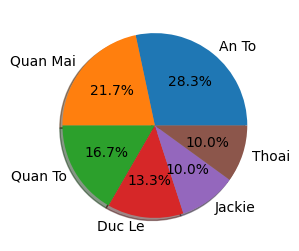

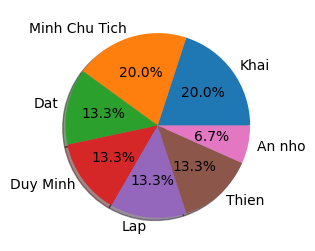

In [83]:
print("Blue team REB: "+str(blue_team['REB'].sum()))
print("Red team REB: "+str(red_team['REB'].sum()))
blue_team.set_index("Full Name")
blue_team.plot(kind='pie', y='REB',ylabel="", labels=green_team['Full Name'],autopct='%1.1f%%',figsize=(5, 3), legend=False,shadow=True,subplots=True)
red_team.plot(kind='pie', y='REB',ylabel="", labels=red_team['Full Name'],autopct='%1.1f%%',figsize=(5, 3), legend=False,shadow=True)